Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

__1)__ Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска (GD) и (стохастического градиентного спуска (SGD) или mini-batch градиентного спуска). Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline


In [11]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000,
                                                n_features=10,
                                                bias=3.5,
                                                noise=1.2,
                                                coef=True,
                                                random_state=42)
data

array([[ 0.60445251, -1.07370218, -3.2497644 , ..., -0.15093345,
         1.3668084 , -0.53786247],
       [-1.11185071, -2.28166207,  0.65680583, ..., -0.39030415,
         0.00692472, -0.92342921],
       [-0.16451453, -1.47477854,  0.75664247, ..., -0.85717237,
         0.95949608, -0.36505503],
       ...,
       [ 0.31846077,  0.82241267, -0.65370142, ...,  0.96103967,
        -0.70933852,  2.439255  ],
       [-0.25500604, -0.80745005,  0.18436833, ..., -0.00504018,
        -0.14119675, -0.14961692],
       [-2.26194388, -1.85298665, -0.82890703, ..., -0.3676184 ,
         0.18682191,  0.14954974]])

In [12]:
# Вектор вессов данной модели 
coef

array([78.46795175, 19.36511778, 48.24477094, 25.37933359,  1.85593041,
       57.00013284, 82.84660306,  8.88918862, 29.50696008, 68.28011329])

In [13]:
# функция MSE 
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [14]:
mse_preg = mserror(data, coef, target)
mse_preg

13.768478193109432

In [15]:
def grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        
        err = mserror(W, X.T ,y)
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (W.dot(X.T) - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [16]:
data_grad, mse_grad, score_grad = grad_desc(data, target, alpha=0.001, tol=0.00001) 

Stop descent! iteration: 3982, weights: [78.40515539 19.32543297 48.20376535 25.38282615  1.88261954 56.98877094
 82.82385453  8.94245819 29.49728474 68.25411509], mse: 13.764229110860114


In [17]:
def sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            err = mserror( W, X_tmp,y_tmp)
            W -= alpha * (1 / n * 2 * ((W @ X_tmp) - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [18]:
data_sgd, mse_sgd, score_sgd = sgd(data, target, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 8000, weights: [78.4314664  19.32736033 48.22008643 25.38493501  1.88238502 57.00895326
 82.85019754  8.93891696 29.49716434 68.27406952], mse: 7.363844130600341e-06


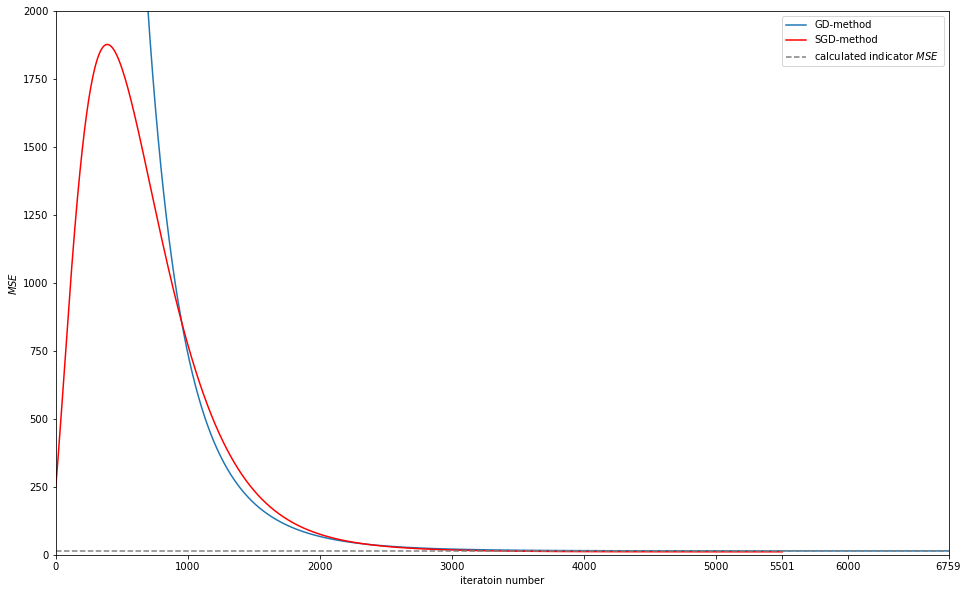

In [10]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_grad)-1000))
plt.plot([x for x in range(len(score_grad))], score_grad, label='GD-method')
plt.plot([x for x in range(len(score_sgd))], score_sgd, c='r', label='SGD-method')
plt.axhline(mse_preg, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_grad), len(score_sgd)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()